# Training a Perceptron with IRIS dataset
The dataset consists of 150 records of Iris plant with four features: 'sepal-length', 'sepal-width', 'petal-length', and 'petal-width'. All of the features are numeric. The records have been classified into one of the three classes i.e. 'Iris-setosa', 'Iris-versicolor', or 'Iris-verginica'.

## Dataset Loading

In [1]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


## Preprocessing

### Divide data into training and test sets 

In [2]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

It will shuffle the datasets prior to splitting using a internal __pseudo-random number generator__. With such a fixed random_state ensures that our results are __reproducible__.

In this context, `stratification` means that the `train_test_split` method returns training and test subsets that have the same proportions of class labels as the input dataset.

In [3]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


### Normalize the feature set
Many machine learning and optimization algorithms also require `feature scaling` for optimal performance

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# X_train_std = sc.fit_transform(X_train)
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Training on the training dataset
Most algorithms in scikit-learn already support multiclass classification by default via the `One-versus-Rest (OvR)` method, which allows us to feed the three flower classes to the perceptron all at once.

In [6]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

Here, the model parameter `eta0` is equivalent to the learning rate eta that we used in our own perceptron implementation, and the `max_iter` parameter defines the number of epochs (passes over the training set).

Finding an appropriate learning rate requires some experimentation. If the learning rate is too large, the algorithm will overshoot the global cost minimum. If the learning rate is too small, the algorithm requires more epochs until convergence, which can make the learning slow—especially for large datasets.

## Predicting on the test dataset

In [8]:
y_pred = ppn.predict(X_test_std)

## Performance Evaluation

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('Misclassified samples: %d' % (y_test != y_pred).sum())
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Misclassified samples: 1

Confusion Matrix:
[[15  0  0]
 [ 1 14  0]
 [ 0  0 15]]

Accuracy:  0.9777777777777777

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# Modeling Class Probabilities with Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, random_state=1)

In [12]:
lr.predict_proba(X_test_std[:3, :])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17]])

In [13]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [14]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

# Building a Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

A nice feature in scikit-learn is that it allows us to export the decision tree as a `.dot` file after training, which we can visualize using the `GraphViz` program, for example.

We may need install `pydotplus` via 
```
pip install pydotplus
```

and `graphviz` via
```
sudo apt install graphviz
```

In [20]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, filled=True, rounded=True, class_names=['Setosa', 'Versicolor', 'Virginica'], feature_names=['petal length', 'petal width'], out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

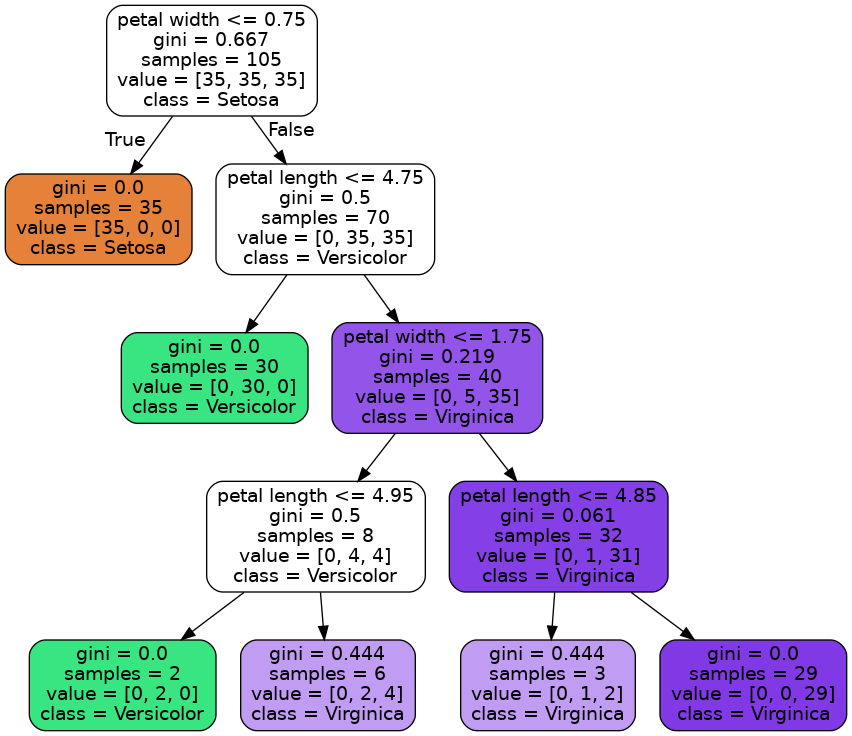

In [21]:
from IPython.display import Image

Image('./tree.png')